In [1]:
# Importing all the necessary packages

import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from itertools import combinations,permutations

%matplotlib widget

In [2]:
# Loading Iris dataset using scikit-learn
iris_df = load_iris()

In [3]:
iris_df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
class LinearRegression():
    # Initializing the class object
    def __init__(self, alpha, epochs):
        self.alpha = alpha
        self.epochs = epochs
    
    def fit(self, iris_data, iris_target):
        self.X = iris_data    # Data
        self.Y = iris_target    # Target
        self.N = iris_data.shape[0]    # Total number of samples  
        
        # Initializing weight vector and bias
        self.W = np.random.uniform(-1,1,size=(2,))    # Weight vector
        self.B = 0    # Bias
        
        cost = self.batch_gradient_descent()
        return cost
    
        
    # Function to compute predicted values of 'y'
    def predict(self, X) :
        return X @ self.W    # Matrix multiplication
    
    
    # Calculating mean square error
    def costfunc(self):
        cost_mse = ((1/self.N) * np.sum((self.predict(self.X) - self.Y)**2))
        return cost_mse

    
    def batch_gradient_descent(self, batchsize = 32):    # For 100 iterations
        cost_list = []
        
        for i in range(self.epochs):
            y_pred = self.predict(self.X)
            gradient = (2/self.N)*(np.dot(self.X.T,(y_pred - self.Y)))    # Gradient function
            
            # Adjusting weights and bias 
            self.W = self.W - self.alpha * gradient
            cost_grad = self.costfunc()
            cost_list.append(cost_grad)  
        return cost_list

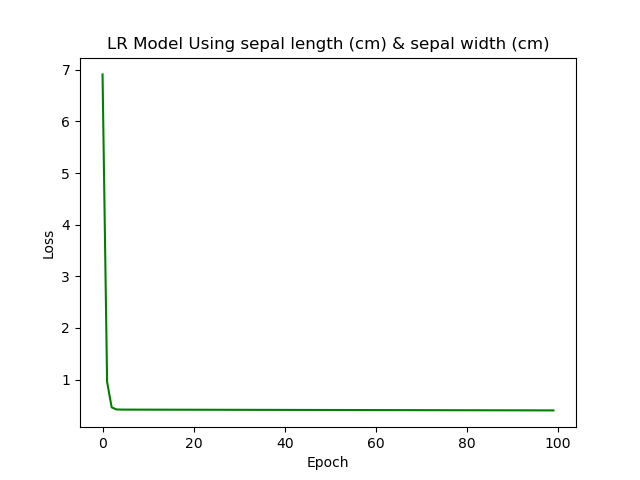

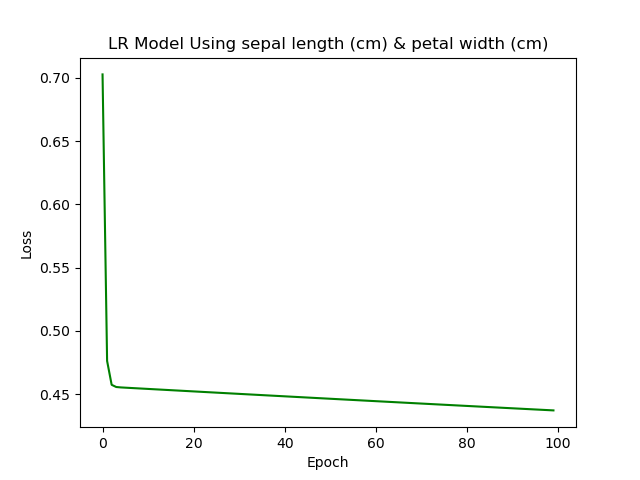

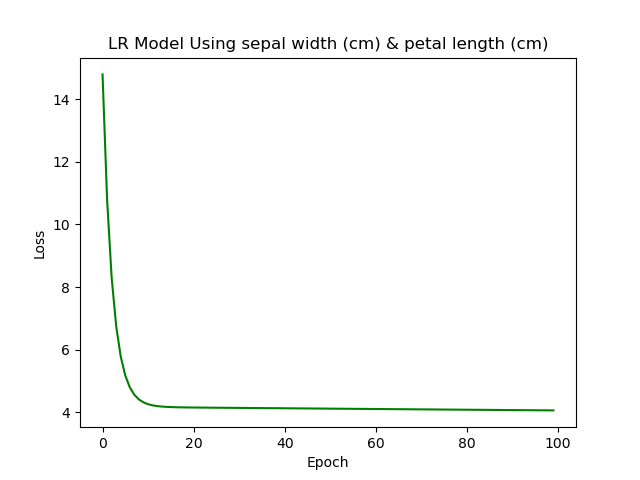

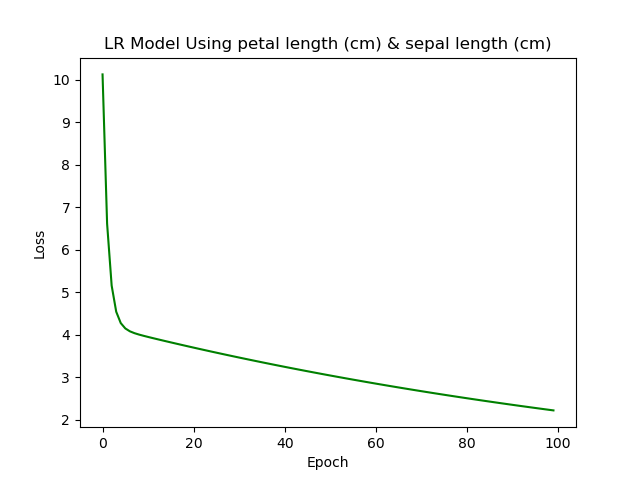

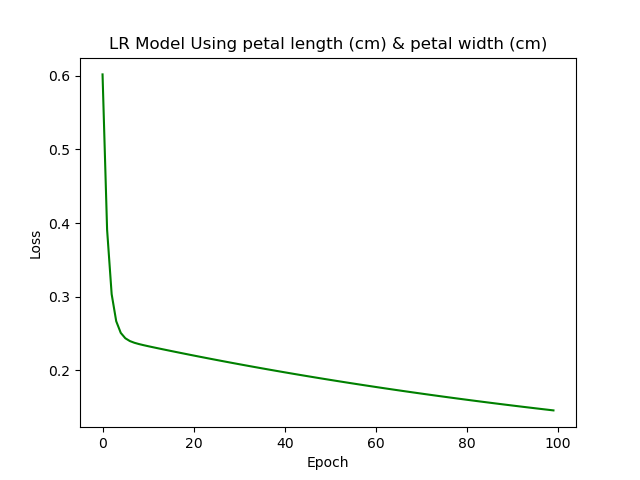

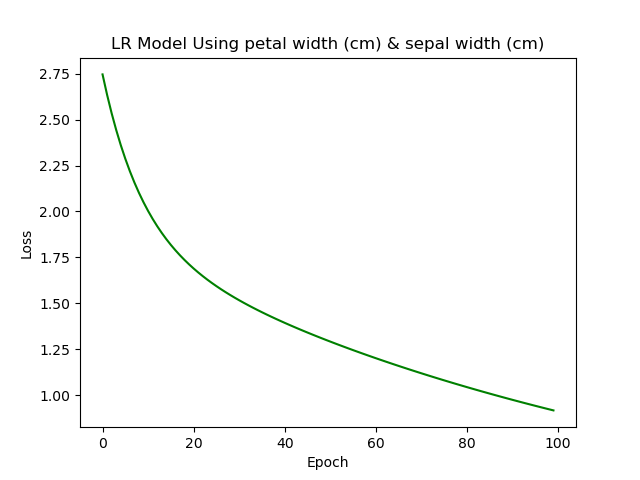

In [5]:
def main():
    
    x = np.array(iris_df.data, dtype = float)    # Data
    y = np.array(iris_df.target, dtype = float)    # Target
    features = iris_df.feature_names    # Feature names
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = y)
        
    # Calling the linear regression model
    lr_model = LinearRegression(0.01, 100)
    iris_models = list(permutations(list(range(4)),2))

    for i,j in enumerate(iris_models):
        if i%2 == 0:
            iris_data = np.stack((np.ones(len(x_train)), x_train[:, j[0]]), axis=1)    # Prepend ones to the data points
            iris_target = x_train[:, j[1]]
            cost = lr_model.fit(iris_data, iris_target)
            plt.figure()
            plt.title('LR Model Using ' + iris_df.feature_names[j[0]] + ' & ' + iris_df.feature_names[j[1]])
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.plot(cost, color = "green", linestyle = 'solid')
    
if __name__ == "__main__":
    main()